In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

Using TensorFlow backend.
/home/roger/Documents/work/206_machineLearning/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [9]:
def parseMatrixFromFile(fname):
    with open(fname) as f:
        for l in f:
            #print(l)
            yield [float(x) for x in l.strip().split()]

In [14]:
data = list(parseMatrixFromFile("midi/projectMIDI/data/parsed/tunes/bas/JohnColtrane_BodyAndSoul_FINAL"))
# print (rhythm_data_)

# rhythm_data_ = rhythm_data_[0]
notes = data[0]
rhythms = data[1]
velocities = data[2]

In [15]:
len(notes)

786

In [16]:
memory = 10

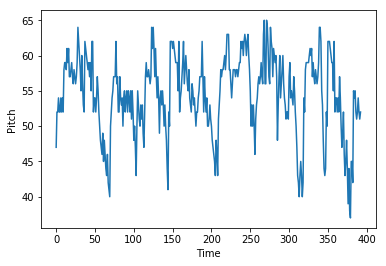

In [27]:
x = [i for (i,x) in enumerate(notes)]
no_rests = []
for note in notes:
    if note>0:
        no_rests.append(note)
x = x[0:len(no_rests)]

plt.plot(x,no_rests)
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.show()

In [50]:
raw_data = np.reshape(no_rests,(len(no_rests),1))

In [51]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(raw_data)

In [52]:
np.shape(dataset)

(393, 1)

In [53]:
train_size = len(dataset)

In [54]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return dataX, dataY

In [55]:
# reshape into X=t and Y=t+1
look_back = memory
X_train, Y_train = create_dataset(dataset, look_back)
trainX = np.array(X_train)
trainY = np.array(Y_train)

In [56]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [57]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, memory)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0797
Epoch 2/100
 - 1s - loss: 0.0297
Epoch 3/100
 - 1s - loss: 0.0252
Epoch 4/100
 - 1s - loss: 0.0228
Epoch 5/100
 - 1s - loss: 0.0203
Epoch 6/100
 - 1s - loss: 0.0187
Epoch 7/100
 - 1s - loss: 0.0179
Epoch 8/100
 - 1s - loss: 0.0172
Epoch 9/100
 - 1s - loss: 0.0165
Epoch 10/100
 - 1s - loss: 0.0158
Epoch 11/100
 - 1s - loss: 0.0154
Epoch 12/100
 - 1s - loss: 0.0152
Epoch 13/100
 - 1s - loss: 0.0151
Epoch 14/100
 - 1s - loss: 0.0147
Epoch 15/100
 - 1s - loss: 0.0148
Epoch 16/100
 - 1s - loss: 0.0147
Epoch 17/100
 - 1s - loss: 0.0146
Epoch 18/100
 - 1s - loss: 0.0143
Epoch 19/100
 - 1s - loss: 0.0144
Epoch 20/100
 - 1s - loss: 0.0144
Epoch 21/100
 - 1s - loss: 0.0141
Epoch 22/100
 - 1s - loss: 0.0139
Epoch 23/100
 - 1s - loss: 0.0143
Epoch 24/100
 - 1s - loss: 0.0145
Epoch 25/100
 - 1s - loss: 0.0142
Epoch 26/100
 - 1s - loss: 0.0139
Epoch 27/100
 - 1s - loss: 0.0141
Epoch 28/100
 - 1s - loss: 0.0137
Epoch 29/100
 - 1s - loss: 0.0140
Epoch 30/100
 - 1s - lo

In [58]:
# make predictions
trainPredict = model.predict(trainX)

In [59]:
np.shape(trainPredict)

(382, 1)

In [60]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

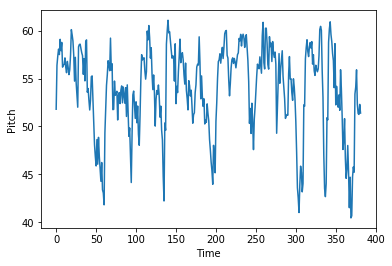

In [62]:
x = [i for (i,x) in enumerate(trainPredict[0:])]
plt.plot(x,trainPredict[0:])
plt.xlabel("Time")
plt.ylabel("Pitch")
plt.show()

In [63]:
np.shape(trainY)

(1, 382)

In [64]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 3.25 RMSE


In [79]:
generated_rhythm = []
# Should be a multiple of len(rhythm_data[0])
num_samples = train_size

# fix random seed for reproducibility
#np.random.seed(7)
start = np.random.randint(0, train_size-1)
print (start)
pattern_raw = list(X_train[0])
pattern = np.array(pattern_raw)
print("Seed:")
print(pattern)

# generate sequence with a random seed
for i in range(num_samples):
    x = np.reshape(pattern, (1, 1, len(pattern)))
    
    prediction = model.predict(x, verbose=0)
    fr = scaler.inverse_transform(prediction)
    
    print(prediction,"----------------",fr)
    generated_rhythm.append(fr[0,0])
    pattern_raw.append(prediction)
    pattern_raw = pattern_raw[1:len(pattern_raw)]
    pattern = np.array(pattern_raw)
print("Generation Completed!")

297
Seed:
[ 0.35714286  0.53571429  0.53571429  0.60714286  0.53571429  0.53571429
  0.60714286  0.53571429  0.60714286  0.53571429]
[[ 0.52859318]] ---------------- [[ 51.80060959]]
[[ 0.53565681]] ---------------- [[ 51.9983902]]
[[ 0.52643782]] ---------------- [[ 51.74026108]]
[[ 0.51834929]] ---------------- [[ 51.51377869]]
[[ 0.51595116]] ---------------- [[ 51.44663239]]
[[ 0.51276278]] ---------------- [[ 51.35735703]]
[[ 0.51329839]] ---------------- [[ 51.3723526]]
[[ 0.51465774]] ---------------- [[ 51.41041565]]
[[ 0.51345718]] ---------------- [[ 51.37680054]]
[[ 0.51323462]] ---------------- [[ 51.37056732]]
[[ 0.51385415]] ---------------- [[ 51.38791656]]
[[ 0.51393998]] ---------------- [[ 51.39031982]]
[[ 0.51378399]] ---------------- [[ 51.385952]]
[[ 0.51345712]] ---------------- [[ 51.37680054]]
[[ 0.51301414]] ---------------- [[ 51.36439514]]
[[ 0.51270103]] ---------------- [[ 51.35562897]]
[[ 0.51239669]] ---------------- [[ 51.34710693]]
[[ 0.51201564]] -----

[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]
[[ 0.51019239]] ---------------- [[ 51.28538513]]


In [73]:
len(generated_rhythm)

393

In [68]:
print(generated_rhythm)

[51.80061, 51.99839, 51.740261, 51.513779, 51.446632, 51.357357, 51.372353, 51.410416, 51.376801, 51.370567, 51.387917, 51.39032, 51.385952, 51.376801, 51.364395, 51.355629, 51.347107, 51.336437, 51.327034, 51.319916, 51.314285, 51.309807, 51.306084, 51.303082, 51.300884, 51.299175, 51.297661, 51.296295, 51.295082, 51.293995, 51.292999, 51.292068, 51.29121, 51.290447, 51.289772, 51.289177, 51.288662, 51.288212, 51.287834, 51.28751, 51.287231, 51.286991, 51.286789, 51.28661, 51.286457, 51.286324, 51.286209, 51.286102, 51.286011, 51.285931, 51.285858, 51.285797, 51.285744, 51.285698, 51.285656, 51.285622, 51.285591, 51.285561, 51.285538, 51.285515, 51.2855, 51.285484, 51.285469, 51.285461, 51.28545, 51.285442, 51.285431, 51.285427, 51.285423, 51.285419, 51.285412, 51.285408, 51.285408, 51.285404, 51.2854, 51.285397, 51.285393, 51.285389, 51.285389, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385, 51.285385

In [ ]:
def write_to_file(filename, arg_list):
    file = open(filename, 'w')
    for item in arg_list:
        file.write(str(item)+" ")
    file.close()
    print("Output dumped to file ",filename)

In [ ]:
write_to_file("mus_dataset_2_output.txt",generated_rhythm)

In [116]:
final_result = np.reshape(generated_rhythm,(len(generated_rhythm)))

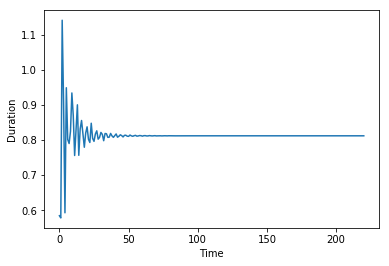

In [117]:
x = [i for (i,x) in enumerate(final_result)]
plt.plot(x,final_result)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()